<h1 align="center"><font color="yellow">Perceptron</font></h1>

<font color="yellow">Data Scientist.: PhD.Eddy Giusepe Chirinos Isidro</font>

Neste script começamos o estudo com `Lightning AI` e para isso usaremos `conda`.

# <font color="red">Instalamos algumas bibliotecas</font>

In [8]:
%conda install numpy pandas matplotlib --yes


Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [9]:
# Instalamos este pacote para poder visualizar nossas bibliotecas instaladas:
%conda install watermark --yes


Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [10]:
%load_ext watermark 
%watermark -v -p numpy,pandas,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.9.13
IPython version      : 8.13.2

numpy     : 1.24.3
pandas    : 2.0.1
matplotlib: 3.7.1



# <font color="red">Carregamos nosso Dataset</font>

In [1]:
import pandas as pd

df = pd.read_csv('./perceptron_toydata-truncated.txt', sep='\t')
df.head()


,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0


In [2]:
X_train = df[["x1", "x2"]].values

y_train = df["label"].values


In [3]:
# Verificamos a forma correta:
X_train

array([[ 0.77, -1.14],
       [-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-0.63, -1.53],
       [ 0.39, -1.99],
       [-0.49, -2.74],
       [-0.68, -1.52],
       [-0.1 , -3.43],
       [-0.05, -1.95],
       [ 3.88,  0.65],
       [ 0.73,  2.97],
       [ 0.83,  3.94],
       [ 1.59,  1.25],
       [ 1.14,  3.91],
       [ 1.73,  2.8 ],
       [ 1.31,  1.85],
       [ 1.56,  3.85],
       [ 1.23,  2.54],
       [ 1.33,  2.03]])

In [4]:
X_train.shape

(20, 2)

In [5]:
y_train.shape

(20,)

In [6]:
import numpy as np

np.bincount(y_train) # Temos neste caso uma Classificação Binária 

array([10, 10])

# <font color="red">Visualização de nossos Dados</font>

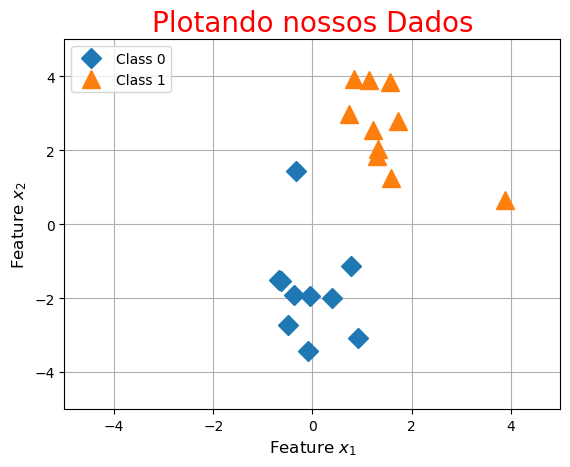

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.title("Plotando nossos Dados", fontsize=20, c="r")
plt.grid()
plt.show()

# <font color="red">Implementando o Perceptron</font>

![](https://raw.githubusercontent.com/Lightning-AI/dl-fundamentals/ee73883722243d8ab40f2f84a2bf10d5426f60d4/unit01-ml-intro/1.6-perceptron-in-python/images/perceptron-sketch.png)

In [8]:
# Criamos uma classe, assim:

class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0


In [9]:
ppn = Perceptron(num_features=2)

In [10]:
ppn.weights

[0.0, 0.0]

In [11]:
ppn.bias

0.0

<font color="orange">Agora vamos a codar a Função Forward do Perceptron:</font>

![](https://raw.githubusercontent.com/Lightning-AI/dl-fundamentals/ee73883722243d8ab40f2f84a2bf10d5426f60d4/unit01-ml-intro/1.6-perceptron-in-python/images/computing-z.png)

In [12]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0

        return prediction
    

In [13]:
ppn = Perceptron(num_features=2)

x = [1.1, 2.1]

ppn.forward(x)

0

In [14]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += error * x[i]

        return error

In [15]:
ppn = Perceptron(num_features=2)

x = [1.1, 2.1]
ppn.update(x, true_y=1)


1

In [16]:
print("Parâmetros do Modelo:")
print("  Weights:", ppn.weights)
print("  Bias:", ppn.bias)


Parâmetros do Modelo:
  Weights: [1.1, 2.1]
  Bias: 1.0


<font color="orange">Agora a seguir implementamos a Função de Treinamento:</font>

In [17]:
def train(model, all_x, all_y, epochs):

    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(all_x, all_y):
            error = model.update(x, y)
            error_count += abs(error)

        print(f"Epoch {epoch+1} errors {error_count}")

In [18]:
ppn = Perceptron(num_features=2)

train(model=ppn, all_x=X_train, all_y=y_train, epochs=10)

Epoch 1 errors 1
Epoch 2 errors 3
Epoch 3 errors 1
Epoch 4 errors 0
Epoch 5 errors 0
Epoch 6 errors 0
Epoch 7 errors 0
Epoch 8 errors 0
Epoch 9 errors 0
Epoch 10 errors 0


# <font color="red">Avaliando os resultados</font>

In [19]:
def compute_accuracy(model, all_x, all_y):

    correct = 0.0

    for x, y in zip(all_x, all_y):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(all_y)

In [20]:
train_acc = compute_accuracy(ppn, X_train, y_train)
train_acc


1.0

In [21]:

print(f"Accuracy: {train_acc*100}%")

Accuracy: 100.0%


# <font color="red">Opcional: visualización del límite de decisión</font>

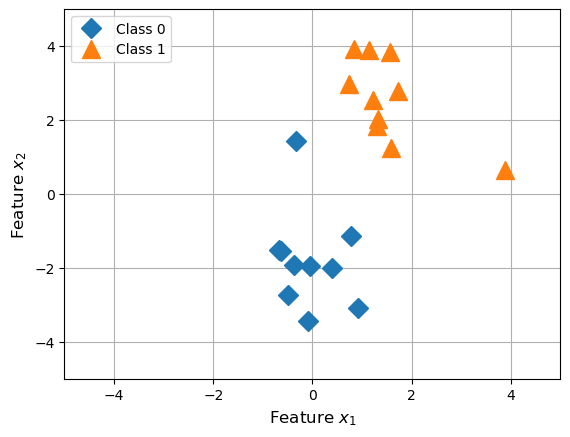

In [22]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()


In [23]:
def plot_boundary(model):

    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max


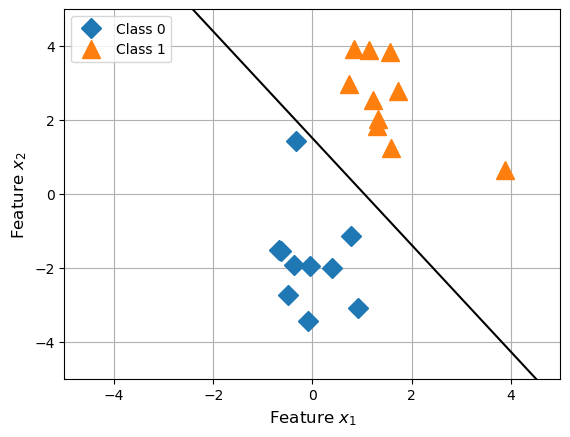

In [24]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)


plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()
